In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_phsen import Parser

In [3]:
# Coastal Endurance Washington Shelf Surface Mooring NSIF (7 meters) PHSEN
baseurl = "https://rawdata.oceanobservatories.org/files/CE02SHSM/D00003/cg_data/dcl26/phsen/"
fname = "20160518.phsen.log"

In [4]:
# initialize the Parser object for PHSEN
phsen = Parser(baseurl + fname)

In [5]:
r = requests.get(phsen.infile, verify=True) # use verify=False for expired certificate
phsen.raw = r.content.decode('utf-8')

In [6]:
len(phsen.raw), phsen.raw[:100]

(31349,
 '2016/05/18 00:30:17.990 [phsen:DLOGP6]:Instrument Started [Power On]\n2016/05/18 00:30:20.557 *EEE70A')

In [7]:
phsen.parse_data()

In [8]:
phsen.data.keys()

dict_keys(['record_time', 'record_type', 'time', 'thermistor_end', 'voltage_battery', 'reference_measurements', 'record_length', 'dcl_date_time_string', 'thermistor_start', 'light_measurements'])

In [9]:
df = pd.DataFrame(phsen.data)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=True, inplace=True)

In [10]:
df.head()

dcl_date_time_string  \
dt_utc                                             
2016-05-18 00:30:20.557  2016/05/18 00:30:20.557   
2016-05-18 01:30:19.555  2016/05/18 01:30:19.555   
2016-05-18 02:30:21.993  2016/05/18 02:30:21.993   
2016-05-18 03:30:19.621  2016/05/18 03:30:19.621   
2016-05-18 04:30:20.999  2016/05/18 04:30:20.999   

                                                        light_measurements  \
dt_utc                                                                       
2016-05-18 00:30:20.557  [2708, 3175, 1560, 2983, 2709, 1357, 1562, 861...   
2016-05-18 01:30:19.555  [2710, 3183, 1555, 2970, 2707, 1326, 1557, 865...   
2016-05-18 02:30:21.993  [2709, 3190, 1555, 2983, 2709, 1330, 1555, 910...   
2016-05-18 03:30:19.621  [2711, 3176, 1557, 2971, 2710, 1211, 1556, 100...   
2016-05-18 04:30:20.999  [2710, 3186, 1554, 2980, 2712, 1181, 1555, 986...   

                         record_length  record_time  record_type  \
dt_utc                                                             
2016-05-18 00:30:20.557            231   3546376242           10   
2016-05-18 01:30:19.555            231   3546379841           10   
2016-05-18 02:30:21.993            231   3546383444           10   
2016-05-18 03:30:19.621            231   3546387041           10   
2016-05-18 04:30:20.999            231   3546390643           10   

                                                    reference_measurements  \
dt_utc                                                                       
2016-05-18 00:30:20.557  [2710, 3180, 1557, 2987, 2703, 3181, 1553, 298...   
2016-05-18 01:30:19.555  [2709, 3183, 1556, 2983, 2708, 3177, 1554, 298...   
2016-05-18 02:30:21.993  [2707, 3188, 1557, 2986, 2709, 3188, 1557, 298...   
2016-05-18 03:30:19.621  [2705, 3187, 1553, 2986, 2708, 3191, 1557, 298...   
2016-05-18 04:30:20.999  [2710, 3194, 1552, 2988, 2714, 3182, 1557, 297...   

                         thermistor_end  thermistor_start          time  \
dt_utc                                                                    
2016-05-18 00:30:20.557            2062              2061  1.463531e+09   
2016-05-18 01:30:19.555            2065              2066  1.463535e+09   
2016-05-18 02:30:21.993            2069              2069  1.463539e+09   
2016-05-18 03:30:19.621            2087              2103  1.463542e+09   
2016-05-18 04:30:20.999            2089              2101  1.463546e+09   

                         voltage_battery  
dt_utc                                    
2016-05-18 00:30:20.557             3137  
2016-05-18 01:30:19.555             3137  
2016-05-18 02:30:21.993             3137  
2016-05-18 03:30:19.621             3137  
2016-05-18 04:30:20.999             3137

In [11]:
# Later, can drop time, and maybe dt_utc (not the index)
df.shape, df.columns

((24, 10),
 Index(['dcl_date_time_string', 'light_measurements', 'record_length',
        'record_time', 'record_type', 'reference_measurements',
        'thermistor_end', 'thermistor_start', 'time', 'voltage_battery'],
       dtype='object'))

In [12]:
df.dtypes

dcl_date_time_string       object
light_measurements         object
record_length               int64
record_time                 int64
record_type                 int64
reference_measurements     object
thermistor_end              int64
thermistor_start            int64
time                      float64
voltage_battery             int64
dtype: object

In [13]:
#extract a specific element from each list of light_measurements
df['light_0'] = [x[0] for x in df['light_measurements']]
df['light_end'] = [x[-1] for x in df['light_measurements']]

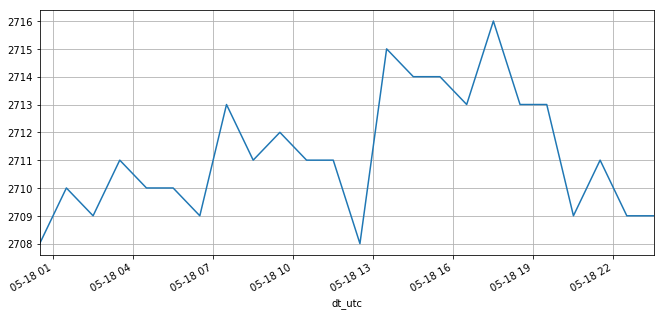

In [14]:
df['light_0'].plot(figsize=(11,5), grid='on');